# Mission 2. Abengers, Assemble!

<hr>

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<hr>

# core Mission -1

### 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

In [2]:
stats_df = pd.read_csv('./charcters_stats.csv')
stats_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
stats_df[stats_df['Total'] == stats_df['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


In [4]:
stats_df.loc[stats_df['Total'] == stats_df['Total'].max(), 'Name'].values[0]

'Martian Manhunter'

<hr>

# Core Mission -2

### 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [5]:
stats_df.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [6]:
# 결측치인 행은 지우기

stats_df.dropna(inplace=True)
stats_df.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [7]:
stats_df[stats_df['Alignment'] == 'good'].describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
std,31.901821,31.422119,25.530982,35.585838,33.895542,33.552737,163.305515
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,28.000000,35.000000,42.000000,244.000000
75%,63.000000,48.000000,38.500000,70.000000,65.250000,70.000000,339.750000
max,100.000000,100.000000,100.000000,110.000000,100.000000,101.000000,581.000000


In [8]:
stats_df[stats_df['Alignment'] == 'bad'].describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
std,35.412116,34.614795,25.960995,37.909843,35.858738,32.397724,174.965808
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,55.000000,13.000000,23.000000,42.000000,45.000000,56.000000,271.000000
75%,75.000000,63.000000,38.000000,85.000000,71.000000,70.000000,373.000000
max,113.000000,100.000000,100.000000,120.000000,100.000000,100.000000,579.000000


In [9]:
stats_df[stats_df['Alignment'] == 'neutral'].describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636
std,18.479473,38.332991,25.479760,32.327585,31.047764,25.784774,122.137032
min,38.000000,10.000000,17.000000,10.000000,12.000000,28.000000,196.000000
25%,50.000000,14.500000,29.500000,63.000000,34.500000,48.000000,259.000000
50%,50.000000,30.000000,42.000000,97.000000,62.000000,70.000000,366.000000
75%,75.000000,85.000000,54.000000,100.000000,84.500000,87.500000,412.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,553.000000


## 0. Alignment

In [10]:
stats_df['Alignment'].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

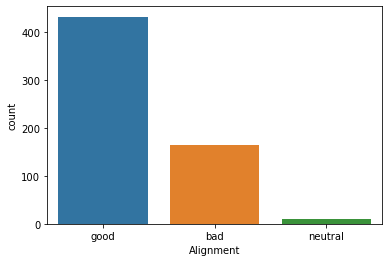

In [11]:
sns.countplot(x='Alignment', data=stats_df)
plt.show()

### $\Rightarrow$ 데이터의 캐릭터의 숫자는 좋은 캐릭터 > 나쁜 캐릭터 > 중립 캐릭터 순이다. (중립은 생각못했는데 Alignment를 시각화 하길 잘했다. 위에도 다시 추가)

## I. Intelligence(지능)

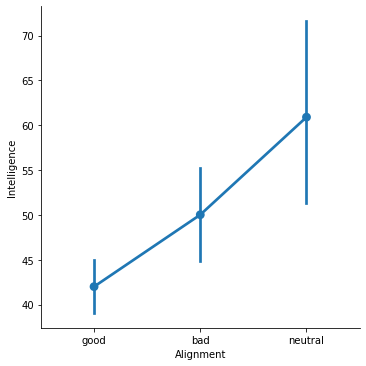

In [12]:
sns.catplot(x='Alignment', y='Intelligence', kind='point', data=stats_df)
plt.show()

In [13]:
stats_df.loc[stats_df['Intelligence'] == stats_df['Intelligence'].max(), ['Name', 'Alignment']]

,Name,Alignment
386,Mister Mxyzptlk,bad


### $ \Rightarrow $ 좋은 캐릭터가 지능의 평균은 제일 낮고, 중립 캐릭터의 지능 평균이 제일 높다. 그리고 지능이 제일 좋은 캐릭터는 나쁜 캐릭터에 속해 있다.

## II. Strength(근력)

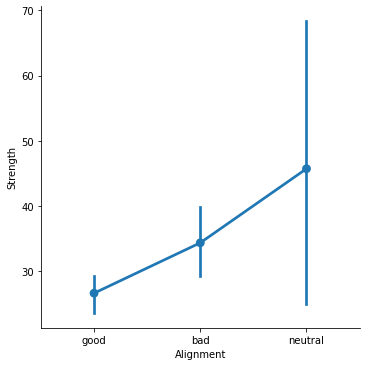

In [14]:
sns.catplot(x='Alignment', y='Strength', kind='point', data=stats_df)
plt.show()

In [15]:
stats_df.loc[stats_df['Strength'] == stats_df['Strength'].max(), ['Name', 'Alignment']].groupby('Alignment').count()

,Name
Alignment,
bad,9
good,14
neutral,2


### $\Rightarrow$ 좋은 캐릭터가 제일 낮고, 중립 캐릭터의 제일 높다. 하지만 가장 높은 근력을 가진 캐릭터를 count해본 결과 좋은 캐릭터에 근력이 좋은 캐릭터가 제일 많이 존재한다. (다른 근력이 낮은 캐릭터로 인해 좋은 캐릭터의 근력을 깍아먹은건 아닌지...)

## III. Speed(스피드)

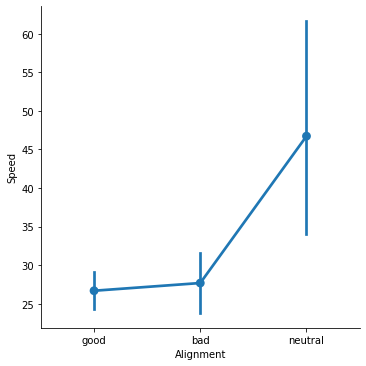

In [16]:
sns.catplot(x='Alignment', y='Speed', kind='point', data=stats_df)
plt.show()

In [17]:
stats_df.loc[stats_df['Speed'] == stats_df['Speed'].max(), ['Name', 'Alignment']].groupby('Alignment').count()

,Name
Alignment,
bad,4
good,12
neutral,1


### IV. Durability(내구성)

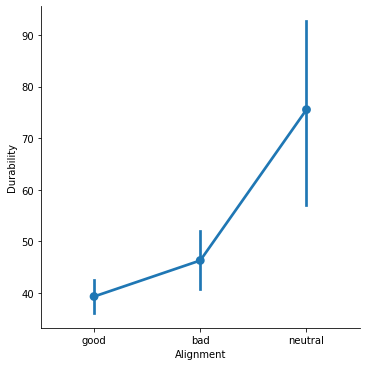

In [18]:
sns.catplot(x='Alignment', y='Durability', kind='point', data=stats_df)
plt.show()

In [19]:
stats_df.loc[stats_df['Durability'] == stats_df['Durability'].max(), ['Name', 'Alignment']]

,Name,Alignment
201,Doomsday,bad


## V. Power(힘)

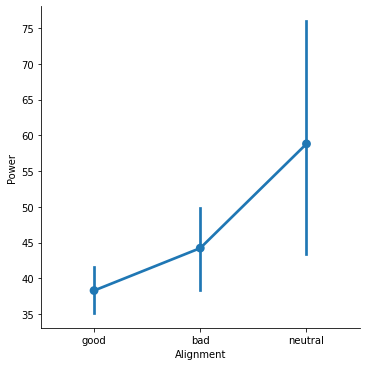

In [20]:
sns.catplot(x='Alignment', y='Power', kind='point', data=stats_df)
plt.show()

In [21]:
stats_df.loc[stats_df['Power'] == stats_df['Power'].max(), ['Name', 'Alignment']].groupby('Alignment').count()

,Name
Alignment,
bad,20
good,33
neutral,2


## VI. Combat(전투)

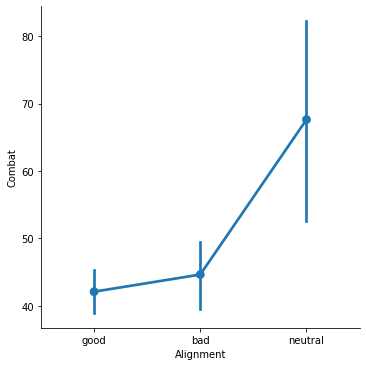

In [22]:
sns.catplot(x='Alignment', y='Combat', kind='point', data=stats_df)
plt.show()

In [23]:
stats_df.loc[stats_df['Combat'] == stats_df['Combat'].max(), ['Name', 'Alignment']]

,Name,Alignment
36,Ares,good


### Speed, Durabillity, power, Combat도 다 좋은 캐릭터의 평균이 제일 낮고, 중립의 평균이 제일 높다


* Speed, power에서 Max()값을 가진 캐릭터는 좋은 캐릭터에 제일 많이 분포한다.
* Durabillity에서 Max()값을 가진 캐릭터는 나쁜 캐릭터에 있다.
* Combat에서 Max()값을 가진 캐릭터는 좋은 캐릭터에 있다.

<hr>

# Extra Mission

In [29]:
comics = pd.read_csv('./marvel_characters_info.csv')
comics = comics[['Name', 'Publisher']]
comics.head()

,Name,Publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics


In [31]:
comics.dropna(inplace=True)
comics.isnull().sum()

Name         0
Publisher    0
dtype: int64

In [33]:
# stats_df와 comics merge

df = stats_df.merge(comics, on='Name', how='left')
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,3-D Man,good,50,31,43,32,25,52,233,NaN
1,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
2,Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
3,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
4,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics


In [44]:
df[df['Publisher'].isnull()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,3-D Man,good,50,31,43,32,25,52,233,NaN
8,Agent 13,good,1,1,1,1,0,1,5,NaN
40,Astro Boy,good,1,1,1,1,0,1,5,NaN
46,Atom I,good,1,1,1,1,0,1,5,NaN
57,Batgirl I,good,1,1,1,1,0,1,5,NaN
58,Batgirl II,good,1,1,1,1,0,1,5,NaN
89,Black Canary I,good,1,1,1,1,0,1,5,NaN
90,Black Canary II,good,1,1,1,1,0,1,5,NaN
107,Blizzard I,bad,1,1,1,1,0,1,5,NaN
115,Blue Beetle I,good,1,1,1,1,0,1,5,NaN


In [45]:
df.dropna(inplace=True)
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
1,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
2,Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
3,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
4,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
5,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics


## 두 csv 파일을 merge한 후 결측치들을 없는 방법으로 처리하였다.

### marvel_characters_info.csv 파일에서는 ['Name', 'Publisher'] column만 사용하였다.

<hr>

## 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.

In [46]:
df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'Team Epic TV', 'HarperCollins', 'ABC Studios',
       'Universal Studios', 'Shueisha', 'Sony Pictures', 'Microsoft'],
      dtype=object)

In [60]:
df[['Total', 'Publisher']].groupby(by='Publisher').mean().sort_values(by='Total', ascending=False)

,Total
Publisher,
Shueisha,481.500000
Microsoft,425.000000
Sony Pictures,398.000000
DC Comics,254.888889
Marvel Comics,243.357349
Universal Studios,237.000000
Dark Horse Comics,196.875000
SyFy,188.800000
ABC Studios,166.000000


In [105]:
temp = df[['Total', 'Publisher']].groupby(by='Publisher').mean()
x, y = list(temp.index), temp.values

y = [int(*i) for i in y]
print(x, y)

['ABC Studios', 'DC Comics', 'Dark Horse Comics', 'Hanna-Barbera', 'HarperCollins', 'Icon Comics', 'Image Comics', 'Marvel Comics', 'Microsoft', 'NBC - Heroes', 'Shueisha', 'Sony Pictures', 'SyFy', 'Team Epic TV', 'Universal Studios', 'Wildstorm'] [166, 254, 196, 5, 5, 148, 70, 243, 425, 140, 481, 398, 188, 5, 237, 5]


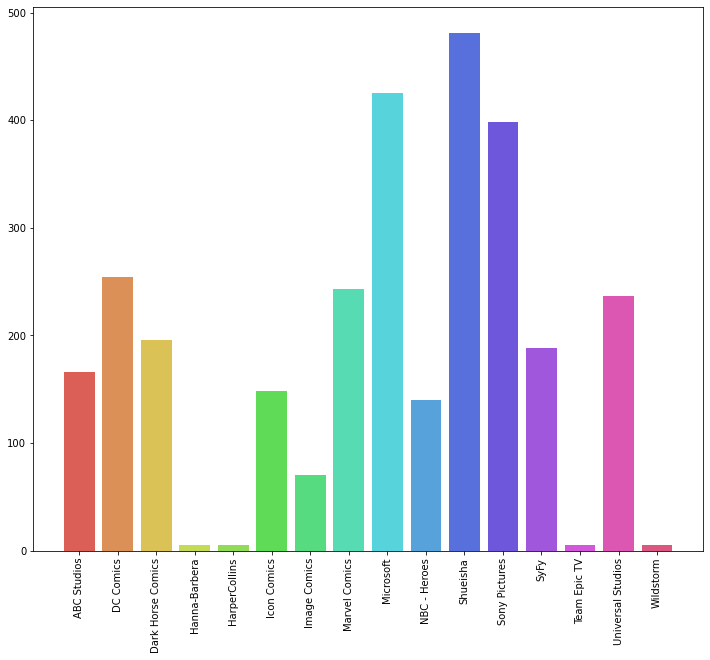

In [115]:
colors = sns.color_palette('hls',len(x)) 

plt.figure(figsize=(12, 10))
plt.bar(x=x, height= y, color=colors)
plt.xticks(rotation=90)
plt.show()

# $\Rightarrow$ Shueisha 출판사의 캐릭터들의 평균이 제일 높다

<hr>

## 2. 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.

In [122]:
df['Alignment'].value_counts()

good       419
bad        160
neutral     11
Name: Alignment, dtype: int64

In [119]:
df.groupby('Alignment').sum().loc[:, 'Total']

Alignment
bad        40313
good       93265
neutral     3909
Name: Total, dtype: int64

# $\Rightarrow $  중립 캐릭터가 나쁜 캐릭터에 붙는다고 해도 좋은 캐릭터가 무조건 이긴다.

# 숫자빨?? (419 > 160 + 11)